In [219]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

$ S = 2 \pi r^2 + 2 \pi r h \rightarrow min $

$ V = \pi r^2 h$

$L =  2 \pi r^2 + 2 \pi r h - \lambda (V - \pi r^2 h) \rightarrow min$

$L'_r = 4\pi r + 2 \pi h - 2\lambda \pi r h =0 $

$L'_h = 2 \pi r - 2\lambda \pi r^2 =0 $

$L'_h = V - \pi r^2 h = 0 $

$ h = V/\pi r^2 $

$ \lambda = 1/r$

$ 2\pi r +  \pi V/\pi r^2 - 1/r \pi r V/\pi r^2 =0 $

$ 2\pi r +  V/ r^2 - V/ r^2 =0 $

In [350]:
alpha=1
beta=0.5
gamma=2

In [312]:
def fun(x,y):
    fun = np.sin(y)*np.exp((1-np.cos(x))**2) + np.cos(x)*np.exp((1-np.sin(y))**2) + (x-y)**2
    return fun

In [313]:
def contract(x_c, x_h):
    x_s = x_c + beta*(x_h - x_c)
    return x_s

In [314]:
radius = 5
center_x = -5
center_y = -5

In [328]:
n = 200

In [329]:
xs = []
ys = []
fs = []
for i in range(n):
    al = 2 * math.pi * random.random()
    r = radius * math.sqrt(random.random())
    x = r * math.cos(al) + center_x
    y = r * math.sin(al) + center_y
    f = fun(x, y)
    xs.append(x)
    ys.append(y)
    fs.append(f)

N of iterations = 98


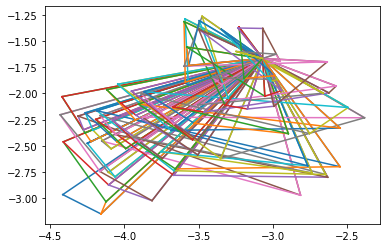

In [331]:
for i in range(200):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
    fss = fs.copy()
    xss = xs.copy()
    yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
    plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break

In [332]:
fun(x_l, y_l)

-105.25251326293963

In [333]:
print(x_l, y_l)

-3.0676783064497477 -1.6667259561518546


In [385]:
n = 10

In [386]:
xs = []
ys = []
fs = []
for i in range(n):
    al = 2 * math.pi * random.random()
    r = radius * math.sqrt(random.random())
    x = r * math.cos(al) + center_x
    y = r * math.sin(al) + center_y
    f = fun(x, y)
    xs.append(x)
    ys.append(y)
    fs.append(f)

print("Initial points: ", xs, ys)
    
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

Initial points:  [-3.5566093532497884, -7.573731375641238, -8.608669463872483, -8.611159303820038, -9.401111558443457, -3.483556302663789, -2.5633604093945364, -4.618728474819964, -1.6556944512064478, -6.218823378029154] [-6.676795502856824, -1.9056031802819935, -5.466550750020679, -2.933522564468414, -6.131821107326437, -9.365775698540538, -4.82524560143001, -9.380807910239309, -3.0989610141689745, -3.566495826773157]
N of iterations = 8
Result:  -3.5566093532497884 -6.676795502856824


In [387]:
xs = []
ys = []
fs = []
for i in range(n):
    al = 2 * math.pi * random.random()
    r = radius * math.sqrt(random.random())
    x = r * math.cos(al) + center_x
    y = r * math.sin(al) + center_y
    f = fun(x, y)
    xs.append(x)
    ys.append(y)
    fs.append(f)

print("Initial points: ", xs, ys)
    
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

Initial points:  [-1.9224492872595058, -3.145281407741463, -1.7998545813083457, -4.600723676535329, -2.3158612985954496, -1.6556408311263104, -2.2377733233416652, -9.512648346494675, -5.210348676352921, -5.789744507260771] [-8.14646058472424, -3.1523466100652575, -5.85080041879504, -4.834159592230347, -9.090915665461456, -6.566232917377062, -7.093765635154437, -4.698062821633411, -1.8363514689587173, -4.3160301589976084]
N of iterations = 8
Result:  -3.145281407741463 -3.1523466100652575


In [401]:
n = 10

In [407]:
xss = []
yss = []
fss = []
for i in range(n):
    al = 2 * math.pi * random.random()
    r = radius * math.sqrt(random.random())
    x = r * math.cos(al) + center_x
    y = r * math.sin(al) + center_y
    f = fun(x, y)
    xss.append(x)
    yss.append(y)
    fss.append(f)

print("Initial points: ", xss, yss)

Initial points:  [-6.329098797957075, -5.284516354539879, -3.941851261186817, -3.0075408771786316, -3.271166043287673, -7.790594716136226, -7.2186236813677915, -4.650555538977103, -3.5158845931826175, -6.080588290557307] [-2.1136488331552545, -5.480697548720526, -2.9501311721258294, -3.097345938809649, -2.877214213397238, -6.917035587385073, -8.77311344376718, -1.4325897754980588, -4.220529424285853, -3.1743931435096058]


In [408]:
alpha = 1

In [409]:
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [410]:
alpha = 2
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [411]:
alpha = 10
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [412]:
alpha = 100
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [413]:
alpha = 1
beta = 0.1
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [414]:
alpha = 1
beta = 0.2
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [415]:
alpha = 1
beta = 0.3
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [416]:
alpha = 1
beta = 0.4 
xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 8
Result:  -3.271166043287673 -2.877214213397238


In [381]:
alpha = 1
beta = 0.5
gamma = 5

xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 48
Result:  -3.104661967810573 -7.714617104590757


In [382]:
alpha = 1
beta = 0.5
gamma = 10

xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 48
Result:  -3.104661967810573 -7.714617104590757


In [383]:
alpha = 1
beta = 0.5
gamma = 100

xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 48
Result:  -3.104661967810573 -7.714617104590757


In [384]:
alpha = 1
beta = 0.5
gamma = 1000

xs = xss.copy()
ys = yss.copy()
fs = fss.copy()
for i in range(50):
    f_h = np.max(fs)
    x_h = xs[np.argmax(fs)]
    y_h = ys[np.argmax(fs)]

    f_l = np.min(fs)
    x_l = xs[np.argmin(fs)]
    y_l = ys[np.argmin(fs)]
    
#     fss = fs.copy()
#     xss = xs.copy()
#     yss = ys.copy()
    
#     fss.remove(f_h)
#     xss.remove(x_h)
#     yss.remove(y_h)

#     f_g = np.max(fss)
#     x_g = xss[np.argmax(fss)]
#     y_g = yss[np.argmax(fss)]

    fs.remove(f_h)
    xs.remove(x_h)
    ys.remove(y_h)
    f_g = np.max(fs)
    x_g = xs[np.argmax(fs)]
    y_g = ys[np.argmax(fs)]
    
#     plt.plot([x_h, x_l, x_g, x_h], [y_h, y_l, y_g, y_h])

    x_c = np.mean(xs)
    y_c = np.mean(ys)

    x_r = x_c + alpha*(x_c - x_h)
    y_r = y_c + alpha*(y_c - y_h)
    f_r = fun(x_r, y_r)

    if f_r < f_l:
        x_e = x_c + gamma*(x_r - x_c)
        y_e = y_c + gamma*(y_r - y_c)
        f_e = fun(x_e, y_e)
        if f_e < f_l:
            x_h = x_e
        elif f_e > f_l:
            x_h = x_r
    elif f_l < f_r < f_g:
        x_h = x_r
        y_h = y_r
    elif f_h > f_r >f_g:
        x_h = x_r
        y_h = y_r
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs = x_l + (xs-x_l)/2
    elif f_r > f_h:
        x_s = contract(x_c, x_h)
        y_s = contract(y_c, y_h)    
        f_s = fun(float(x_s), float(y_s))
        if f_s < f_h:
            x_h = x_s
            y_h = y_s
        elif f_s > f_h:
            xs_arr = np.array(xs)
            ys_arr = np.array(ys)
            xs = (x_l + (xs_arr-x_l)/2).tolist()
            ys = (y_l + (ys_arr-y_l)/2).tolist()
            fs = (fun(np.array(xs), np.array(ys))).tolist()
    
    
    if np.std(xs) < 0.01 and np.std(ys) < 0.01:
        print("N of iterations =", i)
        break
        
print("Result: ", x_l, y_l)

N of iterations = 48
Result:  -3.104661967810573 -7.714617104590757


In [418]:
xs = []
ys = []
fs = []
for i in range(n):
    al = 2 * math.pi * random.random()
    r = radius * math.sqrt(random.random())
    x = r * math.cos(al) + center_x
    y = r * math.sin(al) + center_y
    xs.append(x)
    ys.append(y)

In [ ]:
x_2 = 